In [8]:
from GmGM.synthetic import DatasetGenerator, PrecMatGenerator, PrecMatErdosRenyiGilbert
from GmGM import GmGM

import timeit
from statistics import median
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_timing_data_smart(
    algorithms: dict[str, callable],
    sizes: list[int],
    K: int,
    attempts: int, 
    cutoff: int = 60,
    verbose: bool = False
):  
    includes: dict[str, bool] = {}
    times: dict[str, list[float]] = {}
    
    for algorithm in algorithms:
        includes[algorithm]: bool = True
        times[algorithm]: list[float] = []
    for d in sizes:
        if not any(includes.values()):
            if verbose:
                print("All algorithms timed out")
            break
        if verbose:
            print(f"Starting {(d,) * K}")

        # Generate Data
        structure = {
            "dataset_0": tuple(f"axis_{j}" for j in range(K))
        }
        sub_generators = {
            f"axis_{i}": PrecMatGenerator(
                core_type="coreless",
                mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            )
            for i in range(K)
        }
        generator = DatasetGenerator(
            structure=structure,
            generator=sub_generators,
            size={axis: d for axis in structure["dataset_0"]},
        )
        generator.reroll_Psis()
        dataset = generator.generate({"dataset_0": 1})

        # Test algorithms
        for algorithm in algorithms.keys():
            if not includes[algorithm]:
                continue
            times[algorithm].append(0)
            durations = timeit.Timer(
                lambda: algorithms[algorithm](dataset)
            ).repeat(
                repeat=attempts,
                number=1
            )
            times[algorithm][-1] = median(durations)
            if times[algorithm][-1] >= cutoff:
                if verbose:
                    print(f"{algorithm} ran for longer than {cutoff} seconds")
                    print(f"{algorithm} is no longer being tracked")
                includes[algorithm] = False
            else:
                if verbose:
                    print(f"\t{algorithm}: {times[algorithm][-1]} Seconds")
    print("Done")
    return times

## 2-Axis Runtimes

In [10]:
algorithms = {
    "GmGM": lambda dataset: GmGM(dataset, to_keep=10),
    "GmGM-50pc": lambda dataset: GmGM(dataset, to_keep=10, n_comps=50),
    #"TeraLasso": lambda dataset, structure: TeraLasso(dataset, 0),
    #"EiGLasso": lambda dataset, structure: EiGLasso(dataset, 0),
}
size_data = [
    100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,
    #1100, 1200, 1300, 1400, 1500, 1750, 2000, 2250, 2500,
    #3000, 3500, 4000,
]
timing_data = generate_timing_data_smart(
    algorithms=algorithms,
    sizes=size_data,
    K=2,
    attempts=5,
    verbose=True
)

Starting (100, 100)
	GmGM: 0.03268408300004921 Seconds
	GmGM-50pc: 0.20031870799999751 Seconds
Starting (200, 200)
	GmGM: 0.08468941600000335 Seconds
	GmGM-50pc: 0.18284570899999153 Seconds
Starting (300, 300)
	GmGM: 0.20494662499999095 Seconds
	GmGM-50pc: 0.2686967500000037 Seconds
Starting (400, 400)
	GmGM: 0.34712879199997815 Seconds
	GmGM-50pc: 0.2503795000000082 Seconds
Starting (500, 500)
	GmGM: 0.5546434159999762 Seconds
	GmGM-50pc: 0.28486979100000553 Seconds
Starting (600, 600)
	GmGM: 0.6982211250000319 Seconds
	GmGM-50pc: 0.3355734170000346 Seconds
Starting (700, 700)
	GmGM: 0.9625538749999691 Seconds
	GmGM-50pc: 0.33643295799998896 Seconds
Starting (800, 800)
	GmGM: 1.2657428750000008 Seconds
	GmGM-50pc: 0.4495488329999944 Seconds
Starting (900, 900)
	GmGM: 1.6934070419999898 Seconds
	GmGM-50pc: 0.5109429999999975 Seconds
Starting (1000, 1000)
	GmGM: 2.1932435839999584 Seconds
	GmGM-50pc: 0.46457666599997083 Seconds
Done


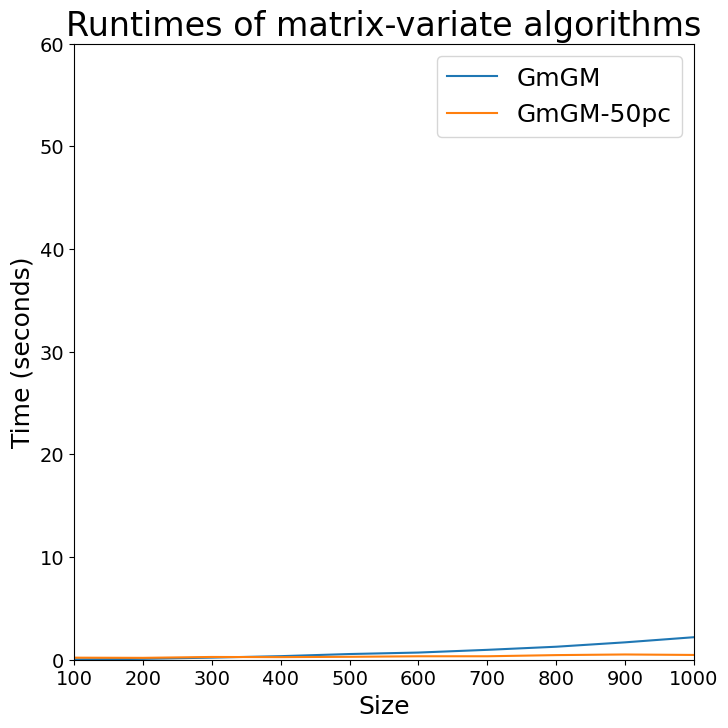

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, algorithm in enumerate(timing_data):
    ax.plot(
        size_data[:len(timing_data[algorithm])],
        timing_data[algorithm],
        label=algorithm,
        #linestyle=linestyles[idx % len(linestyles)]
    )
ax.set_xlabel("Size", fontsize=18)
ax.set_ylabel("Time (seconds)", fontsize=18)
ax.set_title(f"Runtimes of matrix-variate algorithms", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylim([0, 60])
ax.set_xlim([size_data[0], size_data[-1]])
ax.legend(fontsize=18)

## 3-Axis Runtimes

In [15]:
algorithms = {
    "GmGM": lambda dataset: GmGM(dataset, to_keep=10),
    "GmGM-50pc": lambda dataset: GmGM(dataset, to_keep=10, n_comps=50),
    #"TeraLasso": lambda dataset, structure: TeraLasso(dataset, 0),
}
size_data = [
    50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150,
    160, 170, 180, 190, 200, #250, 300, 350, 400,
]
timing_data = generate_timing_data_smart(
    algorithms=algorithms,
    sizes=size_data,
    K=3,
    attempts=5,
    verbose=True
)

Starting (50, 50, 50)
	GmGM: 0.21406608299992058 Seconds
	GmGM-50pc: 0.45079741600000034 Seconds
Starting (60, 60, 60)
	GmGM: 0.3322132920000058 Seconds
	GmGM-50pc: 0.49549045800006297 Seconds
Starting (70, 70, 70)
	GmGM: 0.4823550000000978 Seconds
	GmGM-50pc: 0.5780545830000392 Seconds
Starting (80, 80, 80)
	GmGM: 0.7061309999999139 Seconds
	GmGM-50pc: 0.6160395829999743 Seconds
Starting (90, 90, 90)
	GmGM: 0.9691699580000659 Seconds
	GmGM-50pc: 0.9985938749999832 Seconds
Starting (100, 100, 100)
	GmGM: 1.2949439160000793 Seconds
	GmGM-50pc: 1.3040895420000425 Seconds
Starting (110, 110, 110)
	GmGM: 2.1199669169999424 Seconds
	GmGM-50pc: 2.531306416999996 Seconds
Starting (120, 120, 120)
	GmGM: 2.3240966250000383 Seconds
	GmGM-50pc: 1.9482496670000273 Seconds
Starting (130, 130, 130)
	GmGM: 2.7944663749999563 Seconds
	GmGM-50pc: 2.5699647919999506 Seconds
Starting (140, 140, 140)
	GmGM: 3.314155749999941 Seconds
	GmGM-50pc: 2.550643124999965 Seconds
Starting (150, 150, 150)
	GmGM: 4.0

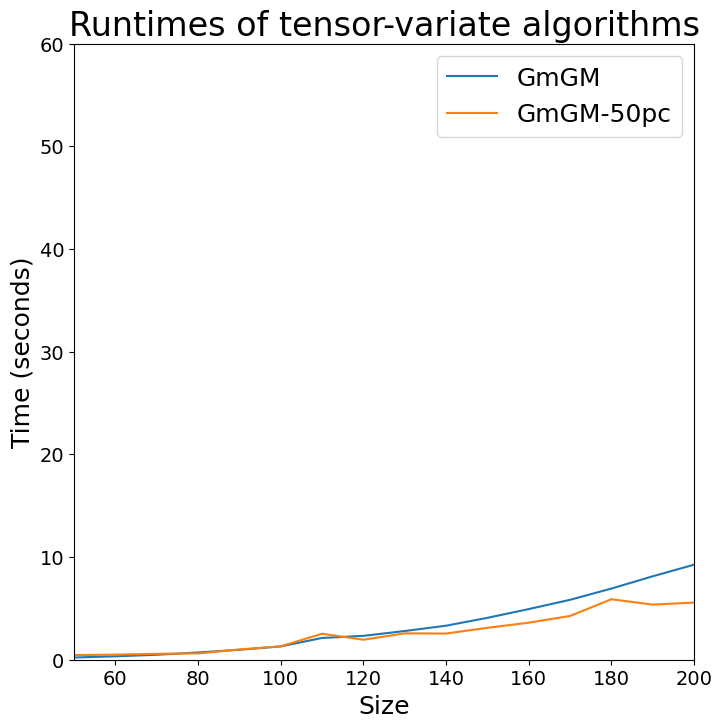

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, algorithm in enumerate(timing_data):
    ax.plot(
        size_data[:len(timing_data[algorithm])],
        timing_data[algorithm],
        label=algorithm,
        #linestyle=linestyles[idx % len(linestyles)]
    )
ax.set_xlabel("Size", fontsize=18)
ax.set_ylabel("Time (seconds)", fontsize=18)
ax.set_title(f"Runtimes of tensor-variate algorithms", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylim([0, 60])
ax.set_xlim([size_data[0], size_data[-1]])
ax.legend(fontsize=18)

## 4-Axis Runtimes

In [18]:
algorithms = {
    "GmGM": lambda dataset: GmGM(dataset, to_keep=10),
    "GmGM-50pc": lambda dataset: GmGM(dataset, to_keep=10, n_comps=50),
    #"TeraLasso": lambda dataset, structure: TeraLasso(dataset, 0),
}
size_data = [
    20, 30, 40, 50, #60, 70, 80, 90, 100
]
timing_data = generate_timing_data_smart(
    algorithms=algorithms,
    sizes=size_data,
    K=4,
    attempts=5,
    verbose=True
)

Starting (20, 20, 20, 20)
	GmGM: 0.21513325000000805 Seconds
	GmGM-50pc: 0.5452521249999336 Seconds
Starting (30, 30, 30, 30)
	GmGM: 0.7697213750000174 Seconds
	GmGM-50pc: 1.261505292000038 Seconds
Starting (40, 40, 40, 40)
	GmGM: 1.2548760829999992 Seconds
	GmGM-50pc: 2.700881957999968 Seconds
Starting (50, 50, 50, 50)
	GmGM: 0.8135792089999541 Seconds
	GmGM-50pc: 8.79878845799999 Seconds
Done


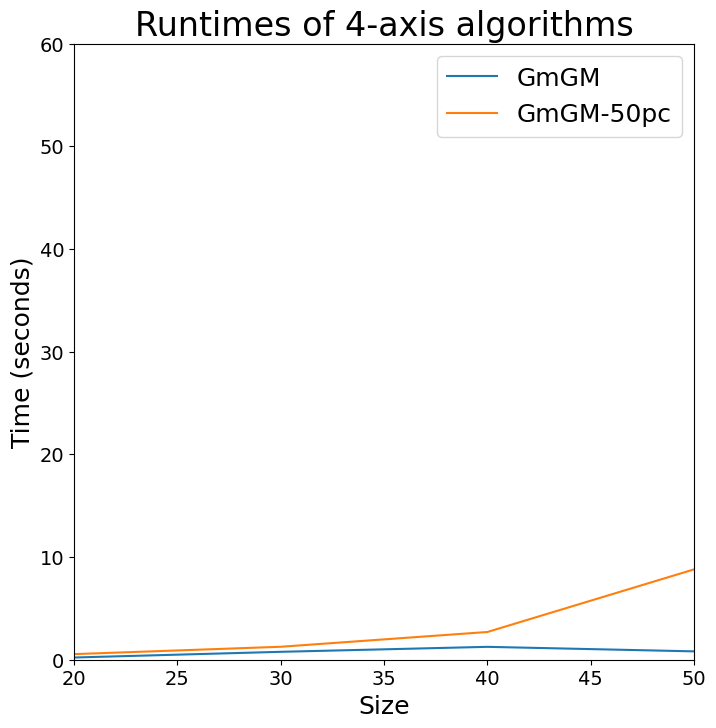

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, algorithm in enumerate(timing_data):
    ax.plot(
        size_data[:len(timing_data[algorithm])],
        timing_data[algorithm],
        label=algorithm,
        #linestyle=linestyles[idx % len(linestyles)]
    )
ax.set_xlabel("Size", fontsize=18)
ax.set_ylabel("Time (seconds)", fontsize=18)
ax.set_title(f"Runtimes of 4-axis algorithms", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylim([0, 60])
ax.set_xlim([size_data[0], size_data[-1]])
ax.legend(fontsize=18)